In [1]:
#Importing all modules
import sys
import time
import os

import pandas as pd
import math
import numpy as np
import random

from loguru import logger
from pathlib import Path

from Naive.node import Node
 

In [2]:
# Data set Prepration [ 70 Patient Diabetic data for of 1 month, Insulin level recorded daily before food]
# Dataset link [ https://archive.ics.uci.edu/ml/machine-learning-databases/diabetes/ ]
time_series_data_final = pd.DataFrame(columns=['PID-Codes'])

filepath = 'Dataset/Diabetes-Data/data-'

for code in {58,59,60,61,62,63,64}:

    for fileno in range(1,71):

        if fileno < 10:
            fileno = '0'+ str(fileno)

        time_series_data = pd.DataFrame(columns=['PID-Codes'])
        diab_dat= pd.read_csv(filepath+str(fileno), sep="\t",header=None)

        time_series_data.at[0,'PID-Codes']= 'P'+ str (fileno) + '-NH' + str(code)

        #codes to
        rslt_df = diab_dat.loc[diab_dat[2] == code] 

        rslt_df=rslt_df[rslt_df.columns[3]]
        final_df = rslt_df[:30]

        index = 1
        for i in final_df:
            try:
                time_series_data.at[0,index]= int(i)
            except:
                pass
            index = index +1
        #print(time_series_data)
        time_series_data_final=time_series_data_final.append(time_series_data, ignore_index = True)
time_series_data_final

,PID-Codes,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,P01-NH64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,P02-NH64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,P03-NH64,156.0,119.0,100.0,138.0,89.0,134.0,125.0,75.0,95.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P04-NH64,94.0,50.0,116.0,182.0,159.0,56.0,163.0,163.0,214.0,...,173.0,31.0,98.0,155.0,72.0,166.0,254.0,181.0,174.0,241.0
4,P05-NH64,154.0,227.0,202.0,80.0,137.0,84.0,202.0,195.0,184.0,...,97.0,139.0,191.0,236.0,132.0,135.0,58.0,55.0,133.0,166.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,P66-NH63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
486,P67-NH63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
487,P68-NH63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
488,P69-NH63,242.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# cleaning the data 
time_series_data_final=time_series_data_final.dropna()
for i in range(1,31):
    time_series_data_final[i] = time_series_data_final[i].apply(np.int64)
time_series_data_final.to_csv('Dataset\diabeties_time_series_data_final.csv', index=False)
time_series_data_final


C:\Users\hp\AppData\Local\Temp/ipykernel_23564/2485360336.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series_data_final[i] = time_series_data_final[i].apply(np.int64)


,PID-Codes,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
3,P04-NH64,94,50,116,182,159,56,163,163,214,...,173,31,98,155,72,166,254,181,174,241
4,P05-NH64,154,227,202,80,137,84,202,195,184,...,97,139,191,236,132,135,58,55,133,166
17,P18-NH64,308,146,99,206,325,97,108,201,364,...,153,227,122,164,56,138,164,96,95,206
18,P19-NH64,122,164,56,138,164,96,95,206,112,...,150,165,326,86,41,187,295,200,95,151
36,P37-NH64,67,112,315,289,90,246,212,61,227,...,226,61,194,256,95,135,118,214,85,103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,P56-NH62,210,210,170,362,98,147,122,104,157,...,239,69,74,61,230,230,192,157,172,145
414,P65-NH62,253,178,133,191,231,216,141,255,308,...,123,161,158,106,201,251,94,272,222,228
416,P67-NH62,158,215,100,63,277,70,123,145,220,...,161,44,169,102,259,179,120,66,67,113
417,P68-NH62,258,135,147,160,105,140,147,137,116,...,187,67,131,94,151,124,147,178,179,126


In [4]:
def create_tree_phase(time_series_data, P_value, paa_value,max_level):
    
    good_leaf_nodes = list()
    bad_leaf_nodes = list()

    print("Create-tree phase: start node splitting")
    node = Node(level=1, group=time_series_data, paa_value=5)
    node.start_splitting(P_value, max_level, good_leaf_nodes, bad_leaf_nodes) # using naive method node splitting 
    
    return good_leaf_nodes, bad_leaf_nodes
    

In [5]:
def recycle_bad_leaves_phase(p_value,good_leaf_nodes, bad_leaf_nodes,paa_value):
    
    suppressed_nodes = list()
    bad_leaves_node_dict = dict()
        
    for node in bad_leaf_nodes:
        if node.level in bad_leaves_node_dict.keys():
            bad_leaves_node_dict[node.level].append(node)
        else:
            bad_leaves_node_dict[node.level] = [node]

    bad_leaf_nodes_size = sum([node.size for node in bad_leaf_nodes])
    
        
    if bad_leaf_nodes_size >= p_value:
        
        current_level = max(bad_leaves_node_dict.keys())
        
        while bad_leaf_nodes_size >= p_value:
            
            if current_level in bad_leaves_node_dict.keys():
                leave_merge_dict = dict()
                keys_remove_list = list()
                merge = False
                
                for current_level_node in bad_leaves_node_dict[current_level]:
                    pattern_rep_node = current_level_node.pattern_representation
                    if pattern_rep_node in leave_merge_dict.keys():
                        merge = True
                        leave_merge_dict[pattern_rep_node].append(current_level_node)
                        if pattern_rep_node in keys_remove_list:
                            keys_remove_list.remove(pattern_rep_node)
                        else:
                            leave_merge_dict[pattern_rep_node] = [current_level_node]
                            keys_remove_list.append(pattern_rep_node)
                    
                    if merge:
                        for k in keys_remove_list:
                            del leave_merge_dict[k]

                        for pr, node_list in leave_merge_dict.items():
                            group = dict()
                            for node in node_list:
                                bad_leaves_node_dict[current_level].remove(node)
                                group.update(node.group)
                            if current_level > 1:
                                level = current_level
                            else:
                                level = 1
                            leaf_merge = Node(level=level, pattern_representation=pr,
                                group=group, paa_value=paa_value)

                            if leaf_merge.size >= p_value:
                                leaf_merge.label = "good-leaf"
                                good_leaf_nodes.append(leaf_merge)
                                bad_leaf_nodes_size -= leaf_merge.size
                            else: 
                                leaf_merge.label = "bad-leaf"
                                bad_leaves_node_dict[current_level].append(leaf_merge)

                new_level = current_level-1
                for node in bad_leaves_node_dict[current_level]:
                    if new_level > 1:
                        values_group = list(node.group.values())
                        data = np.array(values_group[0])
                        data_znorm = znorm(data)
                        data_paa = paa(data_znorm, paa_value)
                        pr = ts_to_string(data_paa, cuts_for_asize(new_level))
                    else:
                        pr = "a"*paa_value
                    node.level = new_level
                    node.pattern_representation = pr

                if current_level > 0:
                    if new_level not in bad_leaves_node_dict.keys():
                        bad_leaves_node_dict[new_level] = bad_leaves_node_dict.pop(current_level)
                    else:
                        bad_leaves_node_dict[new_level] = bad_leaves_node_dict[new_level] + bad_leaves_node_dict.pop(current_level) 
                    current_level -= 1
                else:
                    break 

        
        remaining_bad_leaf_nodes = list(bad_leaves_node_dict.values())[0]
        for node in remaining_bad_leaf_nodes:
            suppressed_nodes.append(node)
        print (suppressed_nodes)

    return suppressed_nodes

In [6]:

def top_down_greedy_clustering(T_series, size, T_clustered,T_structure, label='o', Tmax_value=None, Tmin_value=None):
    
    if len(T_series) < 2*size:
        T_clustered.append(T_series)
        T_structure.append(label)
        return

    indexes = list(T_series.keys())

    t_series_group_one = dict()
    t_series_group_second = dict()

    t_series_seed = indexes[random.randint(0, len(indexes) - 1)] 
    t_series_group_one[t_series_seed] = T_series[t_series_seed]

    old_t_record = t_series_seed 

   
    del T_series[t_series_seed]
    indexes.remove(t_series_seed)


    rounds = 6 if len(T_series) >= 6 else len(T_series)

    for rnd in range(rounds):
        if rnd % 2 == 0:
            source = t_series_group_one
            target = t_series_group_second
        else:
            source = t_series_group_second
            target = t_series_group_one
            
        row_old = tuple_with_max_value_loss(source[old_t_record], T_series, old_t_record)

        target[row_old] = T_series[row_old]
        old_t_record = row_old

        del T_series[row_old]
        indexes.remove(row_old)

    
    random.shuffle(indexes) 

    for i in indexes:
        row = T_series[i]

        t_series_group_one_vals = list(t_series_group_one.values())
        t_series_group_second_vals = list(t_series_group_second.values())

        t_series_group_one_vals.append(row)
        t_series_group_second_vals.append(row)
        
        metric_group_one = instant_value_loss(t_series_group_one_vals)
        metric_group_second = instant_value_loss(t_series_group_second_vals)

        if metric_group_second < metric_group_one:
            t_series_group_second[i] = row
            del t_series_group_one_vals[-1]
        else:
            t_series_group_one[i] = row
            del t_series_group_second_vals[-1]

        del T_series[i]

    
    if len(t_series_group_one) >= size:
        top_down_greedy_clustering(t_series_group_one, size, T_clustered, T_structure, label + 'a', Tmax_value, Tmin_value) 
        T_clustered.append(t_series_group_one)
        T_structure.append(label + 'a')

    if len(t_series_group_second) >= size:
        top_down_greedy_clustering(t_series_group_second, size, T_clustered, T_structure, label + 'b', Tmax_value, Tmin_value) 
    else:
        T_clustered.append(t_series_group_second)
        T_structure.append(label + 'b')


def tuple_with_max_value_loss(base, T_series, key):
    max_value_loss = 0
    best_tuple = None

    for k in T_series.keys():
        if k != key:
            value_loss = instant_value_loss([base, T_series[k]])

            if value_loss >= max_value_loss: 
                max_value_loss = value_loss
                best_tuple = k

    return best_tuple


def instant_value_loss(time_series_QI, r_plus=None, r_minus=None):
  
    QI_length = len(time_series_QI[0])  

    if not r_plus or not r_minus:
        r_plus  = list()
        r_minus = list()


        for i in range(QI_length): 
            r_plus_i  = 0
            r_minus_i = float('inf')

            for row in time_series_QI:
                if row[i] > r_plus_i:
                    r_plus_i = row[i]

                if row[i] < r_minus_i:
                    r_minus_i = row[i]

            r_plus.append(r_plus_i) 
            r_minus.append(r_minus_i)
    
    # Compute VL(t)  then VL(T)
    Instant_value_loss = 0

    for i in range(QI_length):
        Instant_value_loss += pow((r_plus[i] - r_minus[i]), 2) / QI_length

    total_instant_value_loss = len(time_series_QI)*np.sqrt(Instant_value_loss)
    return total_instant_value_loss


def top_down_greedy_clustering_postprocessing(size, T_clustered, T_structure,T_postprocessed, Tmax_value=None, 
                                              Tmin_value=None):
    t_index_merged = list()      
    t_groups_merged = list()    
    t_structure_merged = list() 
  
    for idx, bad_group in enumerate(T_clustered):
        bad_g_size = len(bad_group)
        if bad_g_size < size: 
            bad_group_vals = list(bad_group.values())
            #print(idx)
            #print(T_structure[idx])
            label_1 = list()
            try:
                label_1 = T_structure[idx]
                    
            except:
                pass
            else:
                label_1 = T_structure[idx]
            label = label_1
            Near_neighbor_index = -1
            Near_neighbor_found = False
            Near_neighbor_metric = float('inf')

           
            for other_idx, other_label in enumerate(T_structure):
                
                if label[:-1] == other_label[:-1]: 
                    if idx == other_idx:
                        continue

                   
                    if other_idx not in t_index_merged:
                        Near_neighbor_found = True
                        Near_neighbor_index = other_idx
                        break
           

            merge_with_other_group = False
            if Near_neighbor_found:
                group_nn = T_clustered[Near_neighbor_index]
            elif Near_neighbor_index !=idx:
                if idx - 1 > 0:
                    Near_neighbor_index = idx - 1
                elif idx + 1 < len(T_structure) - 1:
                    Near_neighbor_index = idx + 1 
                group_nn = T_clustered[Near_neighbor_index]
                merge_with_other_group = True

            if Near_neighbor_found or merge_with_other_group:
                group_merged_nn = bad_group_vals

                
                group_merged_nn = group_merged_nn  + list(group_nn.values())
                
                Near_neighbor_metric = instant_value_loss(group_merged_nn)

                
                group_merged_nn = dict()
                group_merged_nn.update(bad_group)
                group_merged_nn.update(group_nn)

           
            metric_large_group = float('inf')
            large_group_index = -1

            for other_idx, other_group in enumerate(T_clustered):
               
                if len(other_group) >= 2*size - bad_g_size: 
                   
                    if other_idx not in t_index_merged:
                        group_merged_large_g = bad_group.copy()
                        group_large_g_vals = list(group_merged_large_g.values())

                       
                        for j in range(size - bad_g_size): 
                            tmp_metric = float('inf')

                            best_record = {}
                            best_row = []

                           
                            for ridx, row in other_group.items():
                                if ridx not in group_merged_large_g.keys():
                                    
                                    metric = instant_value_loss(group_large_g_vals + [ row ])

                                    if metric < tmp_metric: 
                                        best_record = { ridx : row }
                                        tmp_metric = metric
                                        best_row = row
            
                            group_merged_large_g.update(best_record)
                            group_large_g_vals.append(best_row)

                      
                        if tmp_metric < metric_large_group:
                            metric_large_group = tmp_metric
                            large_group_index = other_idx

                          
                            leftover_group_large_g = { k : val for (k, val)
                                    in other_group.items()
                                    if k not in group_merged_large_g.keys() }
     
            if Near_neighbor_metric < metric_large_group: 
                t_index_merged.append(Near_neighbor_index)
                t_groups_merged.append(group_merged_nn)
                t_structure_merged.append(label[:-1]) 
               
            else:
               
                t_index_merged.append(large_group_index)
                t_groups_merged.append(group_merged_large_g)
                t_groups_merged.append(leftover_group_large_g)
              
                t_structure_merged.append('')

           
            t_index_merged.append(idx)

   
    T_clustered = [ group for (idx, group)
            in enumerate(T_clustered)
            if idx not in t_index_merged ]
    T_clustered += t_groups_merged 

    T_structure = [ label for (idx, label)
            in enumerate(T_structure)
            if idx not in t_index_merged]
    T_structure += t_structure_merged

    T_postprocessed += T_clustered

    bad_groups_cnt = 0

    for group in T_clustered:
        if len(group) < size:
            bad_groups_cnt +=1

    if bad_groups_cnt > 0: 
        top_down_greedy_clustering_postprocessing(size, T_clustered, T_structure,T_postprocessed, Tmax_value, Tmin_value)
        

def group_min_value_loss(group_to_search=None, group_to_merge=dict(), index_ignored=list()):
    min_p_group = {"group" : dict(), "index" : None, "value_loss" : float("inf")} 
    for index, group in enumerate(group_to_search):
        if index not in index_ignored: 
            value_loss = instant_value_loss(list(group.values()) + list(group_to_merge.values()))
            if value_loss < min_p_group["value_loss"]:
                min_p_group["value_loss"] = value_loss
                min_p_group["group"] = group
                min_p_group["index"] = index

    return min_p_group["group"], min_p_group["index"]



In [7]:
def group_formation_phase(p_subgroups, p, k ):
    
    kgroup_list= list()
    
    P_group_list = list() 
    splitted_p_subgroups = list()
    p_subgroup_split_indexes = list()
    
    print("Start group formation phase")
    
    # Initialize P_group_list 
    for p_subgroup in p_subgroups: 
        P_group_list.append(p_subgroup)

  
    for p_subgroup_index, p_subgroup in enumerate(P_group_list): 

        if len(p_subgroup) >= 2*p:
        
            tree_clustering = list()
            temp_splitted_p_subgroup = list()

            p_subgroup_to_be_splitted = p_subgroup.copy()
            top_down_greedy_clustering( p_subgroup_to_be_splitted, p, temp_splitted_p_subgroup, tree_clustering)
 
            postprocessed_p_subgroups = list()
            top_down_greedy_clustering_postprocessing(p,temp_splitted_p_subgroup,tree_clustering,postprocessed_p_subgroups) 
                                                            
            splitted_p_subgroups += postprocessed_p_subgroups
            p_subgroup_split_indexes.append(p_subgroup_index) 
    
    P_group_list = [p_subgroup for (p_subgroup_index, p_subgroup) in enumerate(P_group_list) if p_subgroup_index not in p_subgroup_split_indexes]
    P_group_list += splitted_p_subgroups
    
    p_subgroups_k_promoted_idxs = list() 

    for p_subgroup_index, p_subgroup in enumerate(P_group_list):
        
        if len(p_subgroup) >= k:
            p_subgroups_k_promoted_idxs.append(p_subgroup_index)
            kgroup_list.append(p_subgroup)

    
    P_group_list = [p_subgroup for (p_subgroup_index, p_subgroup) in enumerate(P_group_list) if p_subgroup_index not in p_subgroups_k_promoted_idxs]

    p_subgroups_index_merged = list()
    P_group_list_size= sum([len(p_subgroup) for p_subgroup in P_group_list])

  
    while P_group_list_size>= k:
     
        Group, group_index = group_min_value_loss(group_to_search=P_group_list,index_ignored=p_subgroups_index_merged)
        p_subgroups_index_merged.append(group_index) 
        P_group_list_size-= len(Group)

        while len(Group) < k:
           
            group_min, group_min_index = group_min_value_loss(P_group_list,Group,p_subgroups_index_merged)
            p_subgroups_index_merged.append(group_min_index)
            
            Group.update(group_min) 
            P_group_list_size-= len(group_min)
       
        kgroup_list.append(Group) 


    p_subgroups_left = [p_subgroup for (p_subgroup_index, p_subgroup) in enumerate(P_group_list) if p_subgroup_index not in p_subgroups_index_merged]

  
    for p_subgroup in p_subgroups_left:
       
        k_group_remaining, k_group_remaining_idx = group_min_value_loss(kgroup_list,p_subgroup)   
        kgroup_list.pop(k_group_remaining_idx)
        
        k_group_remaining.update(p_subgroup)
        kgroup_list.append(k_group_remaining)
        
    print("End group formation phase")
    
    return kgroup_list
    
    

In [8]:
def anonymized_data(pattern_Rep_data,anonymized_data,suppressed_data):
    
    final_data_anonymized= dict()
    
    for index in range(0, len(anonymized_data)): 
        
        group = anonymized_data[index]
        
        max_value = np.amax(np.array(list(group.values())), 0)
        min_value = np.amin(np.array(list(group.values())), 0)
        
        for key in group.keys():
            
            final_data_anonymized[key] = list()
            value_row = list()
            for column_index in range(0, len(max_value)):
                value_row.append("[{}-{}]".format(min_value[column_index], max_value[column_index]))
            
            
            value_row.append(pattern_Rep_data[key]) 
            value_row.append("Group: {}".format(index))

            final_data_anonymized[key] = value_row
           
        
    for index in range(0, len(suppressed_data)):
        group = suppressed_data[index]
        for key in group.keys():
            value_row = [" - "]*len(group[key])
            value_row.append(" - ") # PR
            value_row.append(" - ") # group
            if value_row != '-':
                final_data_anonymized[key] = value_row
            
    
    df_from_dict=pd.DataFrame.from_dict(final_data_anonymized,orient='index')
    df_from_dict = df_from_dict[df_from_dict.iloc[: , -1].str.contains("Group")]
    #os.remove('Dataset\output_kapra.csv')
    df_from_dict.to_csv('Dataset\output_kapra.csv')
    return df_from_dict

In [9]:
def KAPRA(K_value, P_value, paa_value ,max_level,time_series_data):
    
    
    #Create tree phase
    good_leaf_nodes, bad_leaf_nodes = create_tree_phase(time_series_data, P_value, paa_value,max_level)
    print ('Good leaf nodes :' + str (len (good_leaf_nodes)) + ' Bad leaf nodes :' + str (len (bad_leaf_nodes) ) )
    
    #Recycle bad-leaves phase
    if(len(bad_leaf_nodes) > 0):
        print ('\n recyling bad leaves phases starts')
        suppressed_nodes = recycle_bad_leaves_phase(P_value, good_leaf_nodes, bad_leaf_nodes, paa_value)
    
 
    suppressed_group_list =list()
    P_group_list =list()
    
    Pattern_Representation =dict()
    
    for node in suppressed_nodes:
        suppressed_group_list.append(node.group)
    
    for node in good_leaf_nodes:
        P_group_list.append(node.group)
        pr = node.pattern_representation

        for key in node.group:
            Pattern_Representation[key] = pr
    
    
    #group formation phase
    k_group_list = group_formation_phase(P_group_list, P_value,K_value)
    #print (k_group_list)

    #Anonymize data
    anonymized_list= anonymized_data(Pattern_Representation,k_group_list,suppressed_group_list)
    
    return anonymized_list


In [10]:
import numpy as np
from loguru import logger
from scipy.spatial.distance import cosine

from saxpy.paa import paa
from saxpy.znorm import znorm 
from saxpy.alphabet import cuts_for_asize
from saxpy.strfunc import idx2letter
from saxpy.sax import ts_to_string, sax_by_chunking

def index_of_letter(letter):    
    return ord(letter) - 97


def compute_feature_vector(time_series, paa_size):
    
    znorm_thresh=0.01
    series_norm = znorm(time_series, znorm_thresh)
    feature_vector = paa(series_norm, paa_size)
    
    return feature_vector


def paa_median_breakpoints(paa_index):
    
    seed=23 
    size=1000000
    paa_reconstruct = np.zeros(paa_index.shape)
    
    No_of_level = np.max(paa_index) + 1
    
    if No_of_level > 1:
        
        breakpoints = cuts_for_asize(No_of_level)
        
        np.random.seed(seed)
        points = np.random.normal(size=size)
        
        for i in range(len(paa_index)):
            
            start_idx = paa_index[i]
            low_breakpoint = breakpoints[start_idx]
            if start_idx < No_of_level-1:
                high_breakpoint = breakpoints[paa_index[i]+1]
            else:
                high_breakpoint = np.inf
            
            paa_reconstruct[i] = np.median(points[(points >= low_breakpoint) & (points < high_breakpoint)])
    
    return paa_reconstruct




def reconstruct_feacture_vector(pr):
   
    paa_index = np.array([index_of_letter(x) for x in pr])
    
    paa_reconstruct_val = paa_median_breakpoints(paa_index)
    
    return paa_reconstruct_val


def two_vector_distance(Vector_X, Vector_Y):
    if (np.sum(Vector_X) > 0) & (np.sum(Vector_Y) > 0):
        vector_distance = cosine(Vector_Y,Vector_Y)
    
    elif (np.sum(Vector_X) == 0) & (np.sum(Vector_Y) == 0):
        vector_distance = 0.
    else:
        vector_distance = 1.
        
    return vector_distance


def pattern_loss(time_series, pr, paa_size):
    
    original_pattern = compute_feature_vector(time_series, paa_size)
    
    pattern_reconstructed = reconstruct_feacture_vector(pr)
      
    pattern_loss_value = two_vector_distance(original_pattern, pattern_reconstructed)
    
    
    return pattern_loss_value, original_pattern, pattern_reconstructed



In [11]:
def measure_metrics(K_value, P_value, timeseries_data_path,anonymized_data_path,algo=None):
    
    max_level = 4
    paa_value = 5
    
    df_series  = pd.read_csv(timeseries_data_path)
    cols_series = list(df_series.columns)[1:]

    time_series_QI = dict()
    for i, row in df_series.iterrows():
        time_series_QI[row[0]]  = list(row[cols_series])
        
    # calculate estimated time taken 
    start_time = time.time()
    if algo =='KAPRA':
        anonymize_list_data = KAPRA(K_value, P_value, paa_value,max_level, time_series_QI)
    else:
        main(K_value, P_value, paa_value, timeseries_data_path)
        
    clear_output()
    end_time = time.time()
    Estimated_time_taken = round(float(end_time - start_time), 2)
    
    
    
    #Calculating Instant value loss
    anonym_Instant_value_loss = 0
    anonymize_df = pd.read_csv(anonymized_data_path)
    anonymize_df = anonymize_df.iloc[: , 1:]
    anonymize_df = anonymize_df.iloc[: , :-2]
    
    attribute_list = [list(anonymize_df.iloc[i]) for i in range(len(anonymize_df))]  # Quasi-identifier attributes
    first_row = list(anonymize_df.iloc[0])

    r_plus  = [0 for _ in range(len(first_row))]
    r_minus = [0 for _ in range(len(first_row))]
        
    for i in range(len(first_row)):  
        re = first_row[i]
        mn,mx = re[1:-1].split('-')
        r_minus[i] = int(mn)
        r_plus[i] = int(mx)

    anonym_Instant_value_loss += instant_value_loss(attribute_list, r_plus=r_plus, r_minus=r_minus)
    anonym_Instant_value_loss = round(anonym_Instant_value_loss,2)
    
    #calculating Pattern loss    
    df_anonym  = pd.read_csv(anonymized_data_path)
    cols_anonym = list(df_anonym.columns)[1:]


    anonym_QI = dict()
    for i, row in df_anonym.iterrows():
        anonym_QI[row[0]]  = list(row[cols_anonym])
  
     # Compute pattern loss for each time series
    num_series = len(time_series_QI)
    pattern_losses = np.zeros((num_series,))
    
    for idx, k in enumerate(time_series_QI.keys()):
        
        if k in anonym_QI.keys():
            
            series = time_series_QI[k]
            pr = anonym_QI[k][-2] 
            paa_size = len(pr)
            
            ploss_val, _, _  = pattern_loss(series,pr,paa_size)
            
            pattern_losses[idx] = ploss_val
            
        else:
            print('Key {} missing'.format(k))
            
    total_pattern_loss = round(np.sum(pattern_losses),2)
                  
    clear_output()

    return Estimated_time_taken,anonym_Instant_value_loss, total_pattern_loss

#measure_metrics_kapra(10,2,'Dataset\Sales_Transaction_Dataset_Weekly_Final.csv','Dataset\output_kapra.csv')    

In [12]:
from Naive.kpanonymity import * 
from IPython.display import clear_output

K_value = {5,10,15,20,25}
 
Varying_K_Naive =pd.DataFrame(columns=['K_value', 'P_value' ,'ETA', 'IVL','PL'])
Varying_P_Naive =pd.DataFrame(columns=['K_value', 'P_value', 'ETA', 'IVL','PL'])

Varying_K_Kapra =pd.DataFrame(columns=['K_value', 'P_value' ,'ETA', 'IVL','PL'])
Varying_P_Kapra =pd.DataFrame(columns=['K_value', 'P_value', 'ETA', 'IVL','PL'])

time_series_data_path = 'Dataset\diabeties_time_series_data_final.csv'
anonym_data_path_Naive ='Dataset\output.csv'
anonym_data_path_kapra = 'Dataset\output_kapra.csv'

for i in K_value :
    P_value = 2
    
    # Naive metrics computation
    ETA_Naive, IVL_Naive, PL_Naive= measure_metrics(i, P_value,time_series_data_path,anonym_data_path_Naive) 
    df_Naive = pd.DataFrame([[i,P_value,ETA_Naive, IVL_Naive, PL_Naive]], columns=['K_value', 'P_value' ,'ETA', 'IVL','PL'])
    Varying_K_Naive=Varying_K_Naive.append(df_Naive)
    
    #Kapra Metrics Computation
    ETA_Kapra, IVL_Kapra, PL_Kapra= measure_metrics(i, P_value,time_series_data_path,anonym_data_path_kapra,'KAPRA') 
    df_Kapra = pd.DataFrame([[i,P_value,ETA_Kapra, IVL_Kapra, PL_Kapra]], columns=['K_value', 'P_value' ,'ETA', 'IVL','PL'])
    Varying_K_Kapra=Varying_K_Kapra.append(df_Kapra)
    
clear_output()        
print(Varying_K_Naive)
print(Varying_K_Kapra)




  K_value P_value   ETA       IVL    PL
0      20       2  0.94  30559.74  82.0
0       5       2  1.18  23629.53  94.0
0      25       2  1.80  30926.79  82.0
0      10       2  1.76  25729.66  96.0
0      15       2  2.35  33377.14  86.0
  K_value P_value   ETA       IVL    PL
0      20       2  0.55  28794.91  75.0
0       5       2  0.52  11397.68  75.0
0      25       2  0.59  31154.33  75.0
0      10       2  0.50  15638.85  75.0
0      15       2  0.56  19381.16  75.0


In [13]:

P_value = {2,3,4,5,6}

for j in P_value :
    K_value = 10
   
    # Naive metrics computation
    ETA_Naive, IVL_Naive, PL_Naive= measure_metrics(K_value, j,time_series_data_path,anonym_data_path_Naive) 
    df_Naive = pd.DataFrame([[K_value,j,ETA_Naive, IVL_Naive, PL_Naive]], columns=['K_value', 'P_value' ,'ETA', 'IVL','PL'])
    Varying_P_Naive=Varying_P_Naive.append(df_Naive)
    
    #Kapra Metrics Computation
    ETA_Kapra, IVL_Kapra, PL_Kapra= measure_metrics(K_value, j,time_series_data_path,anonym_data_path_kapra,'KAPRA') 
    df_Kapra = pd.DataFrame([[K_value,j,ETA_Kapra, IVL_Kapra, PL_Kapra]], columns=['K_value', 'P_value' ,'ETA', 'IVL','PL'])
    Varying_P_Kapra=Varying_P_Kapra.append(df_Kapra)

clear_output()
print(Varying_P_Naive)
print(Varying_P_Kapra)




  K_value P_value   ETA       IVL     PL
0      10       2  3.09  26118.20   91.0
0      10       3  2.74  25538.32  101.0
0      10       4  3.50  25464.37  106.0
0      10       5  3.72  27307.31  109.0
0      10       6  3.44  24967.77  109.0
  K_value P_value   ETA       IVL    PL
0      10       2  0.55  16747.67  75.0
0      10       3  0.40  19842.53  72.0
0      10       4  0.54  19872.64  72.0
0      10       5  0.33  21054.88  83.0
0      10       6  0.40  25662.23  86.0


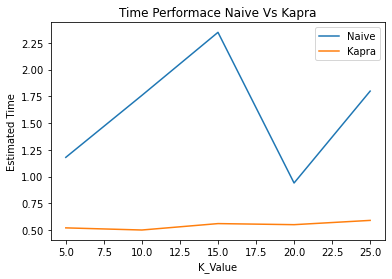

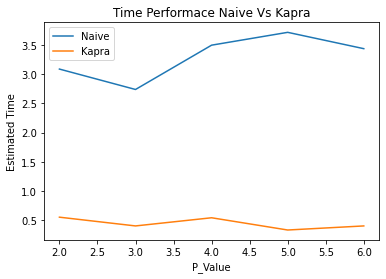

In [14]:
import matplotlib.pyplot as plt

Varying_K_Naive= Varying_K_Naive.sort_values(by=['K_value'])
Varying_K_Kapra= Varying_K_Kapra.sort_values(by=['K_value'])

# Time performance comparision Naive vs Kapra 
x1 = Varying_K_Naive['K_value'].tolist()
y1 = Varying_K_Naive['ETA'].tolist()

plt.plot(x1, y1, label = "Naive")
 

x2 = Varying_K_Kapra['K_value'].tolist()
y2 = Varying_K_Kapra['ETA'].tolist()
plt.plot(x2, y2, label = "Kapra")

plt.xlabel('K_Value')
plt.ylabel('Estimated Time')
plt.title('Time Performace Naive Vs Kapra')
 
plt.legend()
 
plt.show()

# Time performance comparision Naive vs Kapra 
x1 = Varying_P_Naive['P_value'].tolist()
y1 = Varying_P_Naive['ETA'].tolist()

plt.plot(x1, y1, label = "Naive")
 

x2 = Varying_P_Kapra['P_value'].tolist()
y2 = Varying_P_Kapra['ETA'].tolist()
plt.plot(x2, y2, label = "Kapra")

plt.xlabel('P_Value')
plt.ylabel('Estimated Time')
plt.title('Time Performace Naive Vs Kapra')
 
plt.legend()
 
plt.show()

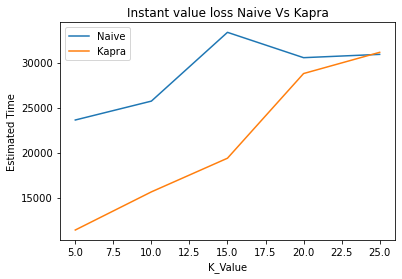

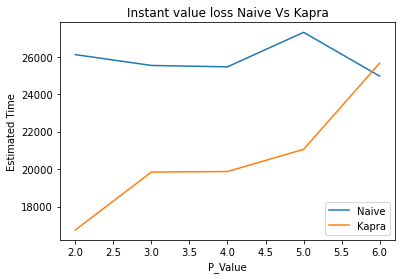

In [15]:
# Instant value loss  comparision Naive vs Kapra 
x1 = Varying_K_Naive['K_value'].tolist()
y1 = Varying_K_Naive['IVL'].tolist()

plt.plot(x1, y1, label = "Naive")
 

x2 = Varying_K_Kapra['K_value'].tolist()
y2 = Varying_K_Kapra['IVL'].tolist()
plt.plot(x2, y2, label = "Kapra")

plt.xlabel('K_Value')
plt.ylabel('Estimated Time')
plt.title('Instant value loss Naive Vs Kapra')
 
plt.legend()
 
plt.show()

# Instant value loss comparision Naive vs Kapra 
x1 = Varying_P_Naive['P_value'].tolist()
y1 = Varying_P_Naive['IVL'].tolist()

plt.plot(x1, y1, label = "Naive")
 

x2 = Varying_P_Kapra['P_value'].tolist()
y2 = Varying_P_Kapra['IVL'].tolist()
plt.plot(x2, y2, label = "Kapra")

plt.xlabel('P_Value')
plt.ylabel('Estimated Time')
plt.title('Instant value loss Naive Vs Kapra')
 
plt.legend()
 
plt.show()

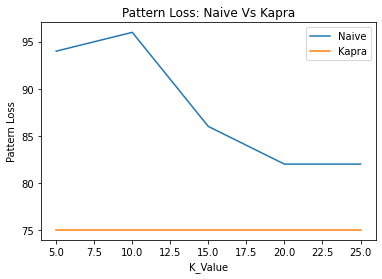

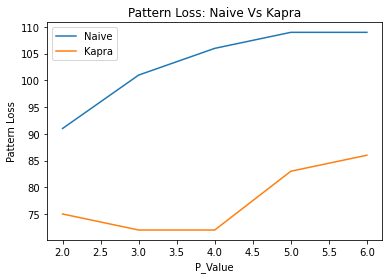

In [16]:
# Pattern loss  comparision Naive vs Kapra 
x1 = Varying_K_Naive['K_value'].tolist()
y1 = Varying_K_Naive['PL'].tolist()

plt.plot(x1, y1, label = "Naive")
 

x2 = Varying_K_Kapra['K_value'].tolist()
y2 = Varying_K_Kapra['PL'].tolist()
plt.plot(x2, y2, label = "Kapra")

plt.xlabel('K_Value')
plt.ylabel('Pattern Loss')
plt.title('Pattern Loss: Naive Vs Kapra')
 
plt.legend()
 
plt.show()

# Time performance comparision Naive vs Kapra 
x1 = Varying_P_Naive['P_value'].tolist()
y1 = Varying_P_Naive['PL'].tolist()

plt.plot(x1, y1, label = "Naive")
 

x2 = Varying_P_Kapra['P_value'].tolist()
y2 = Varying_P_Kapra['PL'].tolist()
plt.plot(x2, y2, label = "Kapra")

plt.xlabel('P_Value')
plt.ylabel('Pattern Loss')
plt.title('Pattern Loss: Naive Vs Kapra')
 
plt.legend()
 
plt.show()